In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
airbnb = pd.read_csv('Cambridge.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,8521,https://www.airbnb.com/rooms/8521,20241228025327,2024-12-28,previous scrape,SunsplashedSerenity walk to Harvard & Fresh Pond,"An elegant, sun-splashed, 2 bedroom (+2offices...",Huron Village is known for its charm. We have...,https://a0.muscache.com/pictures/30536/072e0a5...,306681,...,4.92,4.93,4.74,C0121120491,f,2,2,0,0,0.40
1,11169,https://www.airbnb.com/rooms/11169,20241228025327,2024-12-28,previous scrape,Lovely Studio Room: Available for long w/ends,Large sunny room w kitchenette & bath. Foam ma...,The neighborhood is quiet and friendly and our...,https://a0.muscache.com/pictures/miso/Hosting-...,40965,...,4.92,4.79,4.76,NaN,f,3,1,2,0,1.02
2,19581,https://www.airbnb.com/rooms/19581,20241228025327,2024-12-28,city scrape,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/188f1b4b-f37b...,74249,...,4.90,4.90,4.30,NaN,t,3,0,3,0,0.07
3,27498,https://www.airbnb.com/rooms/27498,20241228025327,2024-12-28,city scrape,Furnished suite 2 @ the Windsor,"Welcome to Area IV! We are located, convenient...",NaN,https://a0.muscache.com/pictures/bab30c3c-ff3c...,74249,...,4.75,4.88,4.63,NaN,t,3,0,3,0,0.15
4,79762,https://www.airbnb.com/rooms/79762,20241228025327,2024-12-28,city scrape,Cambridge Getaway @ Harvard & MIT,Charming 2-bedroom apartment on the third floo...,Annmarie and I have lived in this area for ove...,https://a0.muscache.com/pictures/airflow/Hosti...,430015,...,4.93,4.93,4.76,STR-15661,f,1,1,0,0,2.61


In [8]:
bedrooms= airbnb["bedrooms"]
num_cuartos = bedrooms.value_counts().reset_index()
num_cuartos

,bedrooms,count
0,1.0,766
1,2.0,252
2,3.0,114
3,0.0,36
4,4.0,33
5,5.0,12
6,7.0,3
7,6.0,2
8,8.0,1


In [9]:
airbnb=airbnb.dropna(subset=["price"])
airbnb["price"]=airbnb["price"].str.replace(r"[$,]","",regex=True).astype(float)

In [10]:
df_price_neigh= airbnb.groupby("bedrooms")["price"].mean().reset_index()
df_price_neigh.sort_values(by="price",ascending=False,inplace=True)
df_price_neigh

,bedrooms,price
5,5.0,499.000000
4,4.0,458.190476
7,8.0,388.000000
3,3.0,307.688172
2,2.0,227.045455
0,0.0,140.111111
1,1.0,122.600326
6,7.0,67.500000


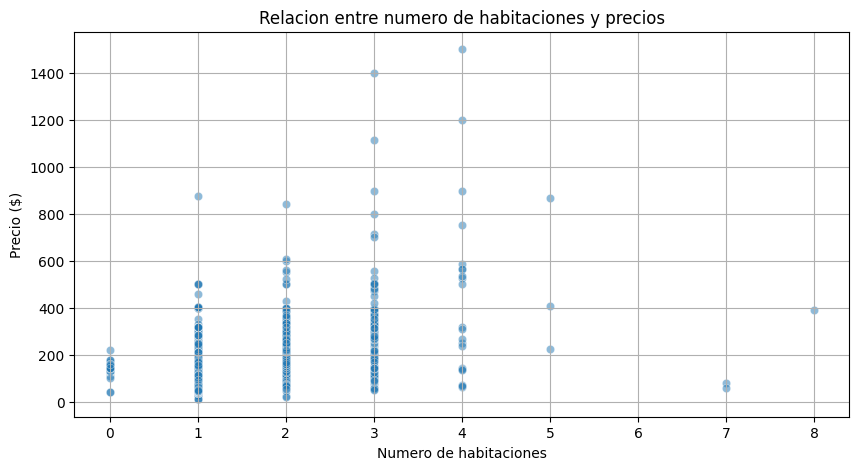

In [11]:
plt.figure(figsize=(10,5))#para decirle que haga la figura y el tamaño de nuestra grafica
sns.scatterplot(data= airbnb, x= 'bedrooms', y='price', alpha=0.5)
plt.title("Relacion entre numero de habitaciones y precios")
plt.xlabel("Numero de habitaciones")
plt.ylabel("Precio ($)")
plt.grid()
plt.show()

In [12]:
df_price_neigh.sort_values(by= 'price', ascending=False, inplace=True)
print(df_price_neigh)

   bedrooms       price
5       5.0  499.000000
4       4.0  458.190476
7       8.0  388.000000
3       3.0  307.688172
2       2.0  227.045455
0       0.0  140.111111
1       1.0  122.600326
6       7.0   67.500000
